# Data Processing notebook.
#### We are here aiming to manipulate the data that we generated before.
#### It will be separated in 6 steps:
1. Data cleaning
2. Provide a list of the 15 most common words
3. Provide a list of the 2 pairs of words having the highest co-occurrence frequency
4. Build a graphical representation of the most frequent words with their polarity (pos/neg or anger/joy/fear/...)
5. Indicate the 3 most frequent representatives words in each category
6. Compare the results of the two approaches

<font size=5 color="#2E1698"><B><u>PARTIE I:</u>  Data cleaning</B></font>
<font size=4 color="#2E1698">**Here, we will clean the dataset in order to analyze it**</font>
<br>


<font size=4 color="#2E1698">**First things first, let's import the csv file**</font>

In [3]:
tweets = read.csv("data/debat_primaire_20000.csv", encoding="UTF-8")

In [4]:
dim(tweets)

[1] 20000    17

<font size=4 color="#2E1698">**So our data frame contains 17 columns and 20 000 rows, let's see the 10 firsts rows**</font>


In [5]:
head(tweets, n = 10)

X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
1,Ce fut un débat intéressnt ! Ccl :Il y'a encore de l'espoir!N'oublions pas qu'un bon président est un président engagé ! #PrimaireLeDebat,FALSE,0,NA,2017-01-19 22:50:06,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OuAtas,0,FALSE,FALSE,NA,NA
2,C'est bon @GoogleFR @TwitterFrance avez vous bien collectés mes données ? Bonne nuit #numerique #bigdata #PrimaireLeDébat,FALSE,0,NA,2017-01-19 22:50:06,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",WajdiHA2,0,FALSE,FALSE,NA,NA
3,"RT @DeLuca_Patrice: .@manuelvalls ""Je veux incarner l'espérance, venez voter dimanche!"" #AvecValls #PrimaireLeDebat",FALSE,0,NA,2017-01-19 22:50:06,FALSE,NA,8.222146e+17,NA,"<a href=""http://www.twitter.com"" rel=""nofollow"">Twitter for Windows</a>",ProvenceValls,5,TRUE,FALSE,NA,NA
4,"RT @DeLuca_Patrice: .@manuelvalls ""Nous avons besoin d'une Europe forte et unie"" #AvecValls #PrimaireLeDebat #Valls2017",FALSE,0,NA,2017-01-19 22:50:05,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Jojo29_BZH,10,TRUE,FALSE,NA,NA
5,RT @LPF_Paris18: #PrimaireLeDebat Dis donc @manuelvalls c'est à coup de #decheancedenationalite et de #49Al3 que tu penses nous sauver? #Mo…,FALSE,0,NA,2017-01-19 22:50:05,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",FranceCredible,6,TRUE,FALSE,NA,NA
6,"""J'ai un progrès précis, crédible, de gauche"", a dit @Vincent_Peillon dans sa conclusion https://t.co/Zs9UHNLcNb… https://t.co/mBtiNvJIAb",FALSE,0,NA,2017-01-19 22:50:05,TRUE,NA,8.222146e+17,NA,"<a href=""http://snappytv.com"" rel=""nofollow"">SnappyTV.com</a>",Europe1,0,FALSE,FALSE,NA,NA
7,RT @benoithamon: #PrimaireLeDebat Paix au Proche-orient : nous devons écouter les sociétés et prendre des initiatives -&gt; reconnaissance de…,FALSE,0,NA,2017-01-19 22:50:05,FALSE,NA,8.222146e+17,NA,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M5)</a>",delpeyrat,225,TRUE,FALSE,NA,NA
8,RT @SylviaPinel: Les contours de son programme restent flous d'ailleurs #PrimaireLeDebat,FALSE,0,NA,2017-01-19 22:50:05,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NouetDom,5,TRUE,FALSE,NA,NA
9,"RT @AnneYunie59000: #PrimaireLeDebat Après les 7 plaies d'Egypte ,les Français ont le droit ce soir aux 7 plaies de la France .",FALSE,0,NA,2017-01-19 22:50:05,FALSE,NA,8.222146e+17,NA,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M5)</a>",delhoume7,20,TRUE,FALSE,NA,NA
10,Voilà pourquoi voter pour #Montebourg dimanche ! #Montebourg2017 #PrimaireLeDebat https://t.co/2dk2xOSLvA,FALSE,0,NA,2017-01-19 22:50:05,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",antoinehb,0,FALSE,FALSE,NA,NA


<font size=4 color="#2E1698">**Let's see if all the columns have multiple values, or if some are useless**</font>


In [6]:
head(unique(tweets$favorited))
head(unique(tweets$favoriteCount))
head(unique(tweets$replyToSN))
head(unique(tweets$replyToUID))
head(unique(tweets$id))
head(unique(tweets$isRetweet))
head(unique(tweets$longitude))
head(unique(tweets$latitude))

[1] FALSE

[1]  0  1  3  2 20 17

[1] <NA>         pv_659       bonnetdAM    adevillaines LorenzZorro 
[6] benoithamon 
265 Levels: _Brindacier _Ecce__Homo_ _harasl 0rel1Lambda ... ZohraBitan

[1]           NA 8.144061e+17 5.008522e+08 8.742537e+07 4.658667e+08
[6] 1.438918e+07

[1] 8.222146e+17 8.222146e+17 8.222146e+17 8.222146e+17 8.222146e+17
[6] 8.222146e+17

[1] FALSE  TRUE

[1]       NA 8.444500 2.395666 2.395496 2.395540 2.331879

[1]       NA 46.81300 48.88828 48.88826 48.88828 48.89228

In [7]:
length(which(tweets$favorited == "TRUE"))
length(which(tweets$favorited == "FALSE"))

[1] 0

[1] 20000

<font size=4 
color="#2E1698">**We can see here that there is no TRUE value for favorited, only FALSE. favorited is useless though.**</font>


In [8]:
length(which(tweets$favoriteCount == 0))
length(which(tweets$favoriteCount != 0))

[1] 16081

[1] 3919

In [9]:
(3919/20000)*100

[1] 19.595

<font size=4 color="#2E1698">**The favoriteCount have multiple values, 20% of the are not 0 we better keep this column. It is maybe a significative data**</font>


In [10]:
length(which(tweets$longitude != "NA"))
length(which(tweets$latitude != "NA"))

[1] 9

[1] 9

In [11]:
(9/20000)*100

[1] 0.045

<font size=4 color="#2E1698">**There is only 9 tweets over 20 000 that contains latitude and longitude, this represents only 0.045% of the tweets, this info can be considered as useless, and we can delete this two columns too.**</font>


In [12]:
length(which(tweets$replyToSN != "NA"))
length(which(tweets$replyToUID != 'NA'))
length(which(tweets$replyToSID != 'NA'))

[1] 698

[1] 698

[1] 445

In [13]:
(698/20000)*100

[1] 3.49

<font size=4 color="#2E1698">**There is only about 3.5% of the replytoSN and replyToUID data that are not NA, we can delete these two columns as they don't seem to be interesting to study.**</font>


<font size=4 color="#2E1698"><B>  Let's delete these useless columns!</B></font>


In [14]:
tweets <- subset(tweets, select=-c(replyToSN,replyToUID, replyToSID, latitude, longitude, favorited))

In [15]:
head(tweets)

X,text,favoriteCount,created,truncated,id,statusSource,screenName,retweetCount,isRetweet,retweeted
1,Ce fut un débat intéressnt ! Ccl :Il y'a encore de l'espoir!N'oublions pas qu'un bon président est un président engagé ! #PrimaireLeDebat,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OuAtas,0,FALSE,FALSE
2,C'est bon @GoogleFR @TwitterFrance avez vous bien collectés mes données ? Bonne nuit #numerique #bigdata #PrimaireLeDébat,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",WajdiHA2,0,FALSE,FALSE
3,"RT @DeLuca_Patrice: .@manuelvalls ""Je veux incarner l'espérance, venez voter dimanche!"" #AvecValls #PrimaireLeDebat",0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://www.twitter.com"" rel=""nofollow"">Twitter for Windows</a>",ProvenceValls,5,TRUE,FALSE
4,"RT @DeLuca_Patrice: .@manuelvalls ""Nous avons besoin d'une Europe forte et unie"" #AvecValls #PrimaireLeDebat #Valls2017",0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Jojo29_BZH,10,TRUE,FALSE
5,RT @LPF_Paris18: #PrimaireLeDebat Dis donc @manuelvalls c'est à coup de #decheancedenationalite et de #49Al3 que tu penses nous sauver? #Mo…,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",FranceCredible,6,TRUE,FALSE
6,"""J'ai un progrès précis, crédible, de gauche"", a dit @Vincent_Peillon dans sa conclusion https://t.co/Zs9UHNLcNb… https://t.co/mBtiNvJIAb",0,2017-01-19 22:50:05,TRUE,8.222146e+17,"<a href=""http://snappytv.com"" rel=""nofollow"">SnappyTV.com</a>",Europe1,0,FALSE,FALSE


<font size=4 color="#2E1698"><B>  If we want to use the text, it have to be cleaned first</B></font>


In [16]:
clean_text = function(x)
{
    #To convert the text in lowercase
    try.error = function(z)
    {
        y = NA
        try_error = tryCatch(tolower(z), error=function(e) e)
            if (!inherits(try_error, "error"))
                y = tolower(z)
                return(y)
    }
    x = sapply(x, try.error)
            
     #remove all links starting by http
    x = gsub('http\\S+\\s*', '', x)
            
    # replace apostrophes
    x = gsub("'", " ", x)

    # remove punctuation except @, #, _, -
    x = gsub("@", "AAAAAAAAAAA", x)
    x = gsub("#", "BBBBBBBBBBB", x)
    x = gsub("_", "CCCCCCCCCCC", x)
    x = gsub("-", "DDDDDDDDDDD", x)
    x = gsub("[[:punct:]]", " ", x)
    x = gsub("AAAAAAAAAAA", "@", x)
    x = gsub("BBBBBBBBBBB", "#", x)
    x = gsub("CCCCCCCCCCC", "_", x)
    x = gsub("DDDDDDDDDDD", "-", x)
            
    # correcting the spaces after the conserved @
    x = gsub("@ ", "@", x)
            
    # correcting the spaces after the conserved _
    x = gsub("_ ", "_", x)
            
    # correcting the spaces after the conserved -
    x = gsub("- ", "-", x)
    
    # remove numbers/Digits
    x = gsub("[[:digit:]]", "", x)
    
    # remove tabs
    x = gsub("[ |\t]{2,}", " ", x)
            
    # remove blank spaces at the beginning/end
    x = gsub("^ ", "", x)  
    x = gsub(" $", "", x)
    
    
    # As we have already a column indicating if the tweet is a retweet or not 
    # we can remove "RT @xxx" in the tweet header
    x = gsub("rt @\\w+ *", "", x)
    x = gsub('\\b\\w{1,3}\\s','', x)
            
    # remove double spaces
    x = gsub("  ", " ", x)
    x = gsub("  ", " ", x)
    return(x)
}

In [17]:
tweets$text <- clean_text(tweets$text)

In [18]:
head(tweets, n = 20)

X,text,favoriteCount,created,truncated,id,statusSource,screenName,retweetCount,isRetweet,retweeted
1,débat intéressnt encore espoir oublions président président engagé #primaireledebat,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OuAtas,0,FALSE,FALSE
2,@googlefr @twitterfrance avez vous bien collectés données bonne nuit #numerique #bigdata #primaireledébat,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",WajdiHA2,0,FALSE,FALSE
3,@manuelvalls veux incarner espérance venez voter dimanche #avecvalls #primaireledebat,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://www.twitter.com"" rel=""nofollow"">Twitter for Windows</a>",ProvenceValls,5,TRUE,FALSE
4,@manuelvalls nous avons besoin europe forte unie #avecvalls #primaireledebat #valls,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Jojo29_BZH,10,TRUE,FALSE
5,#primaireledebat donc @manuelvalls coup #decheancedenationalite #penses nous sauver #mo,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",FranceCredible,6,TRUE,FALSE
6,progrès précis crédible gauche @vincent_peillon dans conclusion,0,2017-01-19 22:50:05,TRUE,8.222146e+17,"<a href=""http://snappytv.com"" rel=""nofollow"">SnappyTV.com</a>",Europe1,0,FALSE,FALSE
7,#primaireledebat paix proche-orient nous devons écouter sociétés prendre initiatives -reconnaissance de,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M5)</a>",delpeyrat,225,TRUE,FALSE
8,contours programme restent flous ailleurs #primaireledebat,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NouetDom,5,TRUE,FALSE
9,#primaireledebat après plaies egypte français droit soir plaies france,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M5)</a>",delhoume7,20,TRUE,FALSE
10,voilà pourquoi voter pour #montebourg dimanche #montebourg #primaireledebat,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",antoinehb,0,FALSE,FALSE


<font size=4 color="#2E1698"><B> Let's see which are the most used @xxx and replace them with words. Afterward we will delete all the @xxx that will not be replaced</B></font>


In [19]:
col = tweets$text
head(col, n=5)

[1] "débat intéressnt encore espoir oublions président président engagé #primaireledebat"                      
[2] "@googlefr @twitterfrance avez vous bien collectés données bonne nuit #numerique #bigdata #primaireledébat"
[3] "@manuelvalls veux incarner espérance venez voter dimanche #avecvalls #primaireledebat"                    
[4] "@manuelvalls nous avons besoin europe forte unie #avecvalls #primaireledebat #valls"                      
[5] "#primaireledebat donc @manuelvalls coup #decheancedenationalite #penses nous sauver #mo"

In [20]:
at.pattern = "@\\w+ *"
have.at = grep(x = col, pattern = at.pattern)
at.matches = gregexpr(pattern = at.pattern,
                        text = col[have.at])
extracted.at = regmatches(x = col[have.at], m = at.matches)

# most frequent words
mfw = sort(unlist(extracted.at), decreasing=TRUE)
mfw = gsub(" ", "", mfw)
d = sort(table(unlist(mfw)), decreasing=TRUE)
head(d, n = 20)


    @benoithamon      @montebourg     @manuelvalls @vincent_peillon 
             985              815              611              511 
        @fderugy  @emmanuelmacron        @francetv     @sylviapinel 
             370              299              296              233 
 @leprojetfrance    @jlbennahmias    @jeunesavecam       @leasalame 
             151              129               68               66 
      @yanngalut @realdonaldtrump         @najatvb          @europe 
              64               61               48               40 
 @francecredible       @fhollande    @davidpujadas        @montebou 
              40               38               35               29 

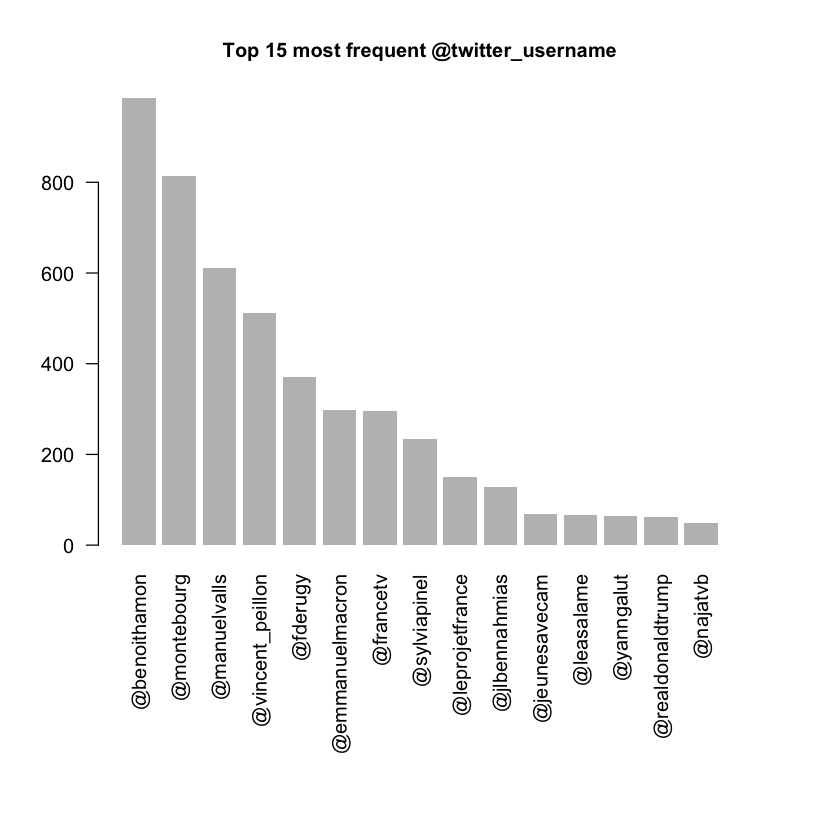

In [21]:
top15 = head(d, n = 15)
# barplot
mar.default <- c(12,4,4,4) + 0.1
par(mar = mar.default + c(0, 0, 0, 0))
barplot(top15, border=NA, las=2, main="Top 15 most frequent @twitter_username", cex.main=1)

<font size=4 color="#2E1698"><B> Let's see which are the most used words</B></font>

In [27]:
at.pattern = "[a-zA-Z]\\w+ *"
have.at = grep(x = col, pattern = at.pattern)
at.matches = gregexpr(pattern = at.pattern,
                        text = col[have.at])
extracted.at = regmatches(x = col[have.at], m = at.matches)

# most frequent words
mfw = sort(unlist(extracted.at), decreasing=TRUE)
mfw = gsub(" ", "", mfw)
w = sort(table(unlist(mfw)), decreasing=TRUE)
head(d, n = 20)


    @benoithamon      @montebourg     @manuelvalls @vincent_peillon 
             985              815              611              511 
        @fderugy  @emmanuelmacron        @francetv     @sylviapinel 
             370              299              296              233 
 @leprojetfrance    @jlbennahmias    @jeunesavecam       @leasalame 
             151              129               68               66 
      @yanngalut @realdonaldtrump         @najatvb          @europe 
              64               61               48               40 
 @francecredible       @fhollande    @davidpujadas        @montebou 
              40               38               35               29 

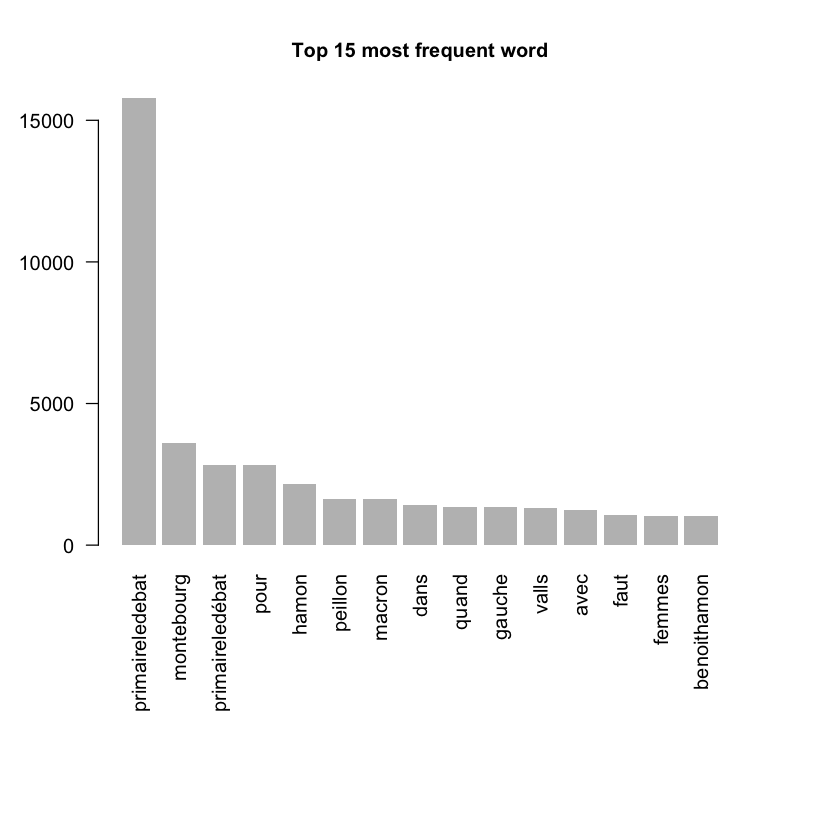

In [28]:
top15 = head(w, n = 15)
# barplot
mar.default <- c(12,4,4,4) + 0.1
par(mar = mar.default + c(0, 0, 0, 0))
barplot(top15, border=NA, las=2, main="Top 15 most frequent word", cex.main=1)